<a href="https://colab.research.google.com/github/vedanttapiavala/Kaggle/blob/main/Titanic_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Broad Overview:

*   Current Public Score: 0.76794 (0.944% improvement over past solution)
*   Decision Tree Classifier with Hyperparameters
*   N/A values in Age filled with DecisionTreeRegressor model



##Google Drive Permissions for Colab

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Download Training Data

In [40]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/drive/My Drive/titanic training data.csv'

df = pd.read_csv(file_path)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


First, let's clean the data by modifying columns:


*   Use ordinal encoding for "Sex" to represent males as 0 and females as 1
*   Remove the PassengerId, Name, Ticket, Cabin Number, and Port of Embarkation columns since those should not have a bearing on whether or not someone survived



In [41]:
# Convert categorical variable "Sex" to numerical via ordinal encoding
df['Sex'] = df['Sex'].replace({"male":0, "female":1})
# Passenger ID, Name, Embarked, Cabin, and Ticket shouldn't matter to survival
# Split training data into input and output for model
input = df.drop(columns=["PassengerId", "Survived", "Name", "Ticket", "Cabin", "Embarked"])
output = df["Survived"]
input.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


# Fixing NA Values in Age
There are 177 NA values in Age, almost 20% of the data!
To fill in these values, we could adopt one of the following methods:


*   Drop all records with an NA age value, losing 20% of the training data that we have
*   Set all of the NA age values to the median for the dataset
*   Set all of the NA age values to the median for their sex and purchasing class
*   Combine these variables using another Decision Tree Regressor (computationally expensive usually but there's fewer than 200 values so this is the chosen method)

Since we'll have to do a similar thing for the testing data set, this model will not be trained on whether someone survived. We'll run this model without hyperparameter tuning due to avoid significant additional computational resource usage.



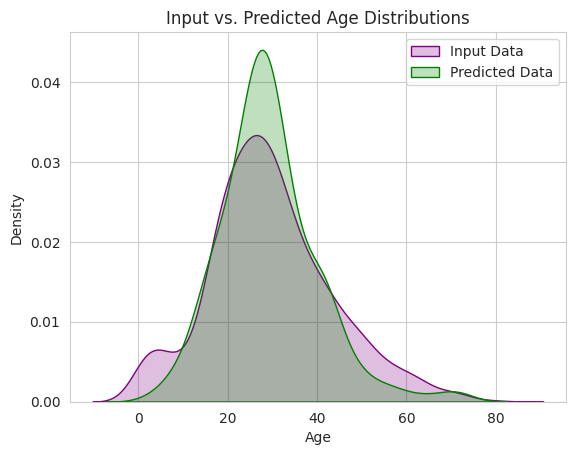

In [42]:
inputWithoutAgeNA = input.dropna(subset=["Age"])
inputAgeFindingModel = inputWithoutAgeNA.drop(columns=["Age"])
outputAgeFindingModel = inputWithoutAgeNA["Age"]
ageFindingModel = DecisionTreeRegressor()
ageFindingModel.fit(inputAgeFindingModel, outputAgeFindingModel)
inputAgeNA = input[input["Age"].isna()].drop(columns=["Age"])
outputAgeNA = ageFindingModel.predict(inputAgeNA)
# Merge the outputAgeNA into the original training data
input.loc[input["Age"].isna(), "Age"] = outputAgeNA
# Visualize the predicted and given Age data using Kernel Density Estimate (KDE) plots
sns.set_style("whitegrid")
sns.kdeplot(data=input['Age'], color='purple', label='Input Data', fill=True)
sns.kdeplot(data=outputAgeNA, color='green', label='Predicted Data', fill=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Input vs. Predicted Age Distributions')
plt.legend()
plt.show()

The predicted age data has a slightly tighter distribution than the input data, but the median and 1st/3rd quartile data seems to be around the same.
# Input Survival Data

In [43]:
testData = pd.read_csv("/content/drive/My Drive/titanic test data.csv")
# Same ordinal encoding on test data as was done in training data
testData['Sex'] = testData['Sex'].replace({"male":0, "female":1})
# Same columns dropped in test data as training data
testInput = testData.drop(columns=["PassengerId", "Name","Ticket","Cabin","Embarked"])
testInput.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,0.363636,30.272590,0.447368,0.392344,35.627188
std,0.841838,0.481622,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


# Data Cleaning on Test Data


*   We will use the same DecisionTreeRegressor for filling in NA values in Age since so much of the data is NA
*   Before we do that, however, we need to fill in the one NA value in the Fare column; we will do so with the median of the column



In [44]:
# Simplifying assumption of filling Fare data with the median of the non-NA values
testInput['Fare'] = testInput['Fare'].fillna(14.454200)

# Run same DecisionTreeRegressor on test age data to fill in blank Age values
# In future: could build a combined input/output of test and training data to better predict ages
# This model could then be used on NA ages for both training and test with better model accuracy due to increased sample size
testInputWithoutNA = testInput.dropna(subset=["Age"])
inputTestAgeModel = testInputWithoutNA.drop(columns=["Age"])
outputTestAgeModel = testInputWithoutNA["Age"]
testAgeFindingModel = DecisionTreeRegressor()
testAgeFindingModel.fit(inputTestAgeModel, outputTestAgeModel)
testInputAgeNA = testInput[testInput["Age"].isna()].drop(columns=["Age"])
testOutputAgeNA = testAgeFindingModel.predict(testInputAgeNA)
# Merge the testOutputAgeNA into the original test data
testInput.loc[testInput["Age"].isna(), "Age"] = testOutputAgeNA
testInput.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.363636,29.593193,0.447368,0.392344,35.576535
std,0.841838,0.481622,13.312444,0.896760,0.981429,55.850103
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,38.000000,1.000000,0.000000,31.471875
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


# Running DecisionTreeClassifier on Test Data to get Predictions

In [45]:
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
model = DecisionTreeClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(input, output)
model = grid_search.best_estimator_
prediction_data = pd.DataFrame(testInput, columns=input.columns)

predictions = model.predict(prediction_data)
predictions_df = pd.DataFrame(predictions, columns=["Survived"])
predictions_df["PassengerId"] = testData['PassengerId']
predictions_df = predictions_df[['PassengerId', 'Survived']]
predictions_df.to_csv('/content/drive/My Drive/predictions.csv', index=False)